# Life Expectancy Prediction Project
This notebook covers the implementation of OLS and Logit regression models using the 'Life Expectancy' dataset.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

## Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
file_path = ("/content/drive/MyDrive/foundation_of_analytics/Exam/Final/updated_life_expectancy_data.csv")  # Replace with your file path
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life_expectancy_category
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Low
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Low
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Low
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Low
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Low


In [ ]:
# To ignore warnings on output
import warnings
warnings.filterwarnings("ignore")

## Data cleaning and pre-processing

In [ ]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling',
       'Life_expectancy_category'],
      dtype='object')

In [ ]:
# Removing whitespace from column headers
df.columns = df.columns.str.strip()

In [ ]:
df.shape

(2938, 22)

In [ ]:
# Dropping duplicate variables
df.drop_duplicates(inplace = True)

In [ ]:
# Verifying the shape of the dataset after dropping duplicates
df.shape

(2938, 22)

In [ ]:
print(df.dtypes)

Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Life_expectancy_category            object
dtype: object


In [ ]:
#Checking for nulls
df.isnull().sum()

,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0
BMI,34


In [ ]:
# Select numerical columns based on datatype
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Address Missing Values
for col in numerical_columns:
    if col in ['Population']:  # Using mean for widely distributed column 'population'
        df[col].fillna(df[col].mean(), inplace=True)
    elif df[col].isnull().sum() > 0:  # Using median for remaining numerical variables
        df[col].fillna(df[col].median(), inplace=True)

# Print missing values to verify no missing values remain
print("Updated Missing Values:\n", df.isnull().sum())


Updated Missing Values:
 Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Life_expectancy_category           0
dtype: int64


## Performing EDA

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.275338e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.381546e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,3.675929e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Few insights from summary statistics:

- The highest life expectancy is 89 years whereas the lowest is 36.3 years. The average life expectancy is 69.2 years.

- Average BMI is 38.38 with the highest being 87.3. Both average and median (43.5) can be considered obese.

- Average adult mortality is 164.7 per 1000 with the lowest being 1 and the highest being 723.

- The highest GDP per capita (in USD) is 119172.74 whereas the lowest is 1.68.

- From government perspective, the highest government expenditure in health from government's total expenditure is 17.6% whereas the lowest is 0.37%. Additionally, the highest govenment expenditure in health as per Gross Domestic Product per capita is 19479.9 whereas the lowest is 0.

In [ ]:
print('The average Life expectancy is', round(
    np.mean(df['Life expectancy']), 2), 'and the median is', round(
    np.median(df['Life expectancy']), 2))

The average Life expectancy is 69.23 and the median is 72.1


In [ ]:
print('The average BMI is', round(
    np.mean(df['BMI']), 2), 'and the median is', round(
    np.median(df['BMI']), 2))

The average BMI is 38.38 and the median is 43.5


In [ ]:
print('The average Adult Mortality (per 1000 population) is', round(
    np.mean(df['Adult Mortality']), 2), 'and the median is', round(
    np.median(df['Adult Mortality']), 2))

The average Adult Mortality (per 1000 population) is 164.73 and the median is 144.0


### Distributions

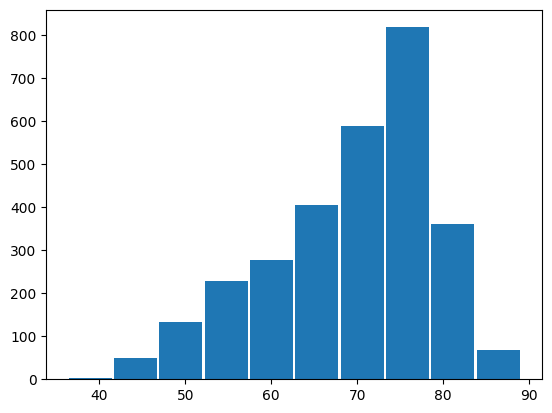

In [ ]:
plt.hist(df['Life expectancy'], rwidth=0.95);

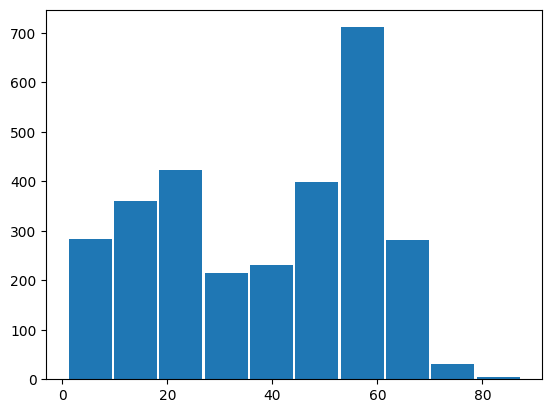

In [ ]:
plt.hist(df['BMI'], rwidth=0.95);

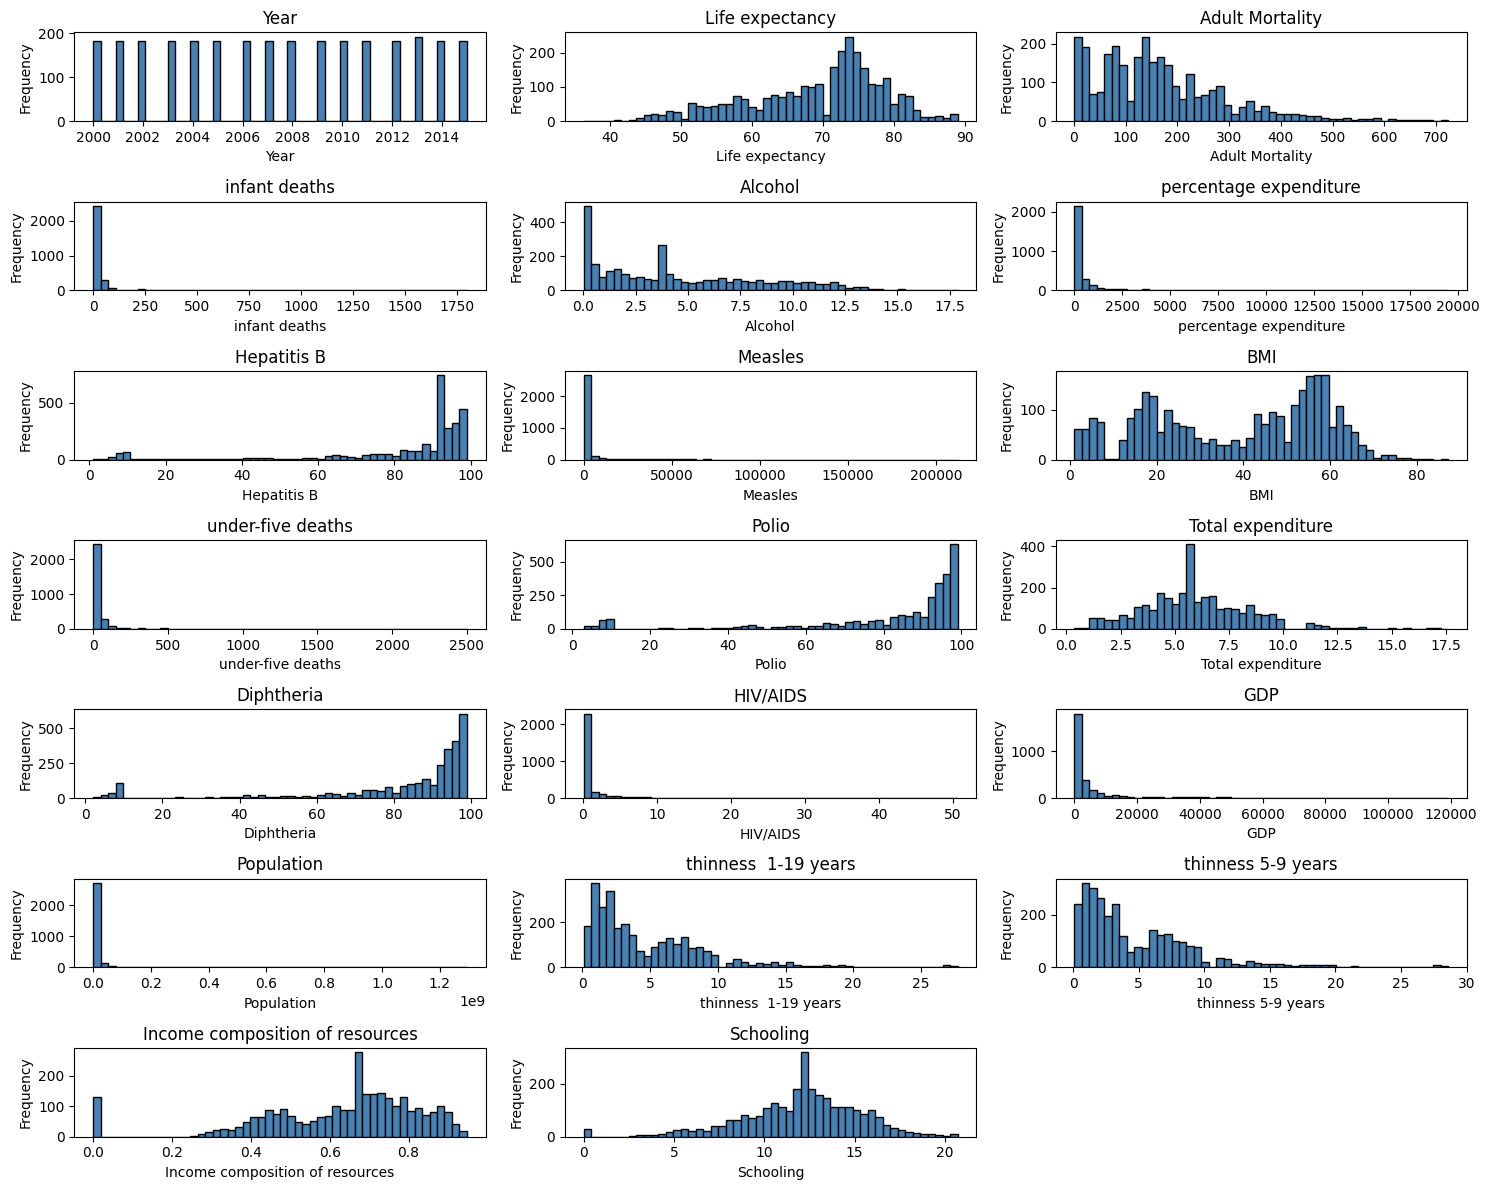

In [ ]:
# Plot histograms for all numerical variables
plt.figure(figsize=(15, 12))  # Adjust overall figure size
for i, col in enumerate(numerical_columns, 1):  # Enumerate through numerical columns
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)  # Arrange in a grid of 3 columns
    plt.hist(df[col].dropna(), bins=50, color='steelblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

Text(0.5, 0, 'GDP')

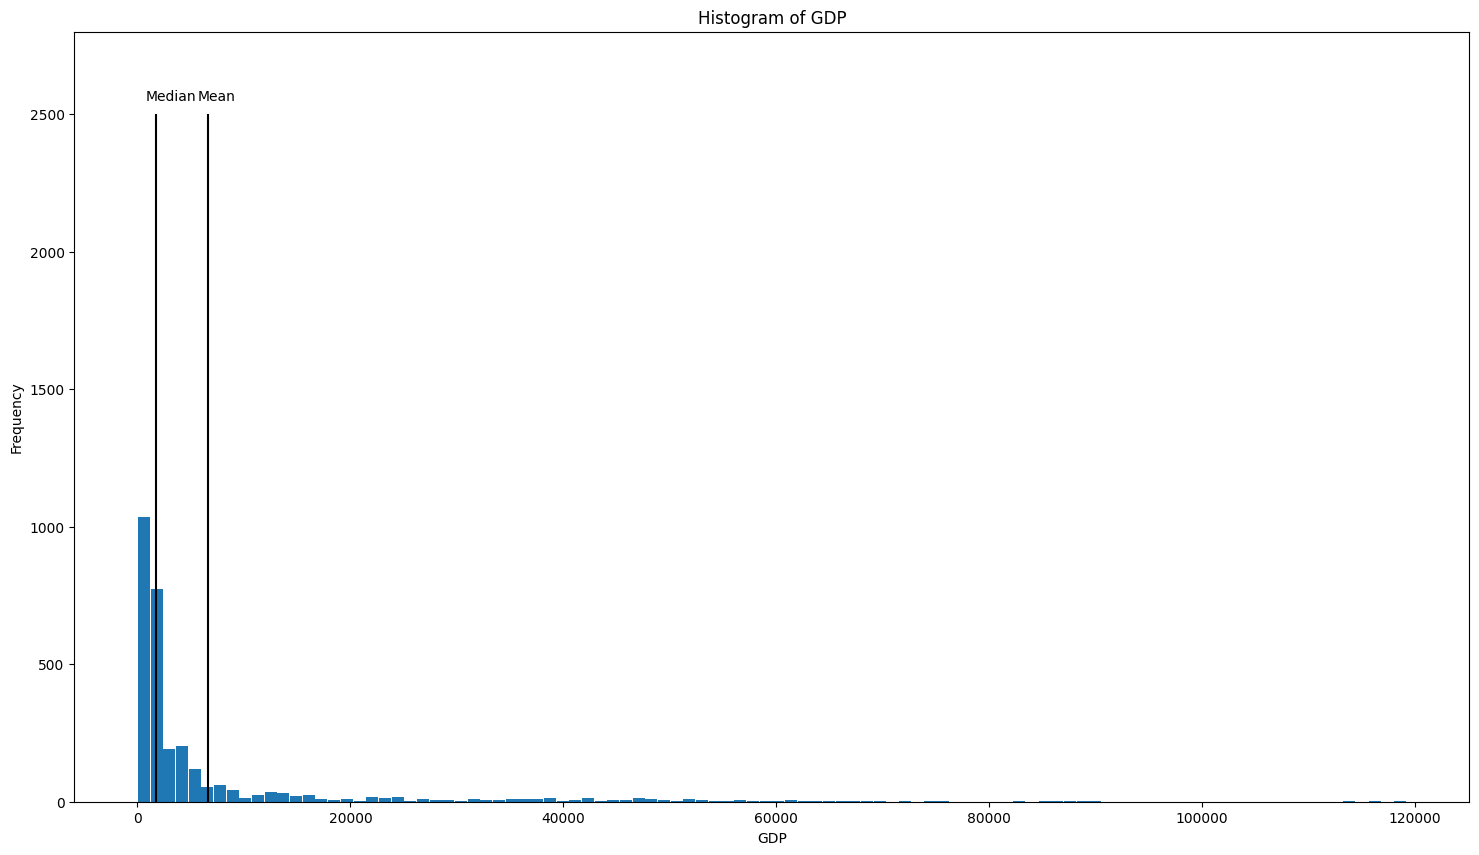

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(df['GDP'], bins=100, rwidth=0.95)

plt.vlines(df['GDP'].mean(), 0, 2500, colors='Black')
plt.vlines(df['GDP'].median(), 0, 2500, colors='Black')
plt.text(df['GDP'].mean()-1000, 2500+50, "Mean")
plt.text(df['GDP'].median()-1000, 2500+50, "Median")
plt.ylim(0, 2800)
plt.title("Histogram of GDP")
plt.ylabel('Frequency')
plt.xlabel('GDP')

Text(0.5, 1.0, 'Histogram of Adult Mortality')

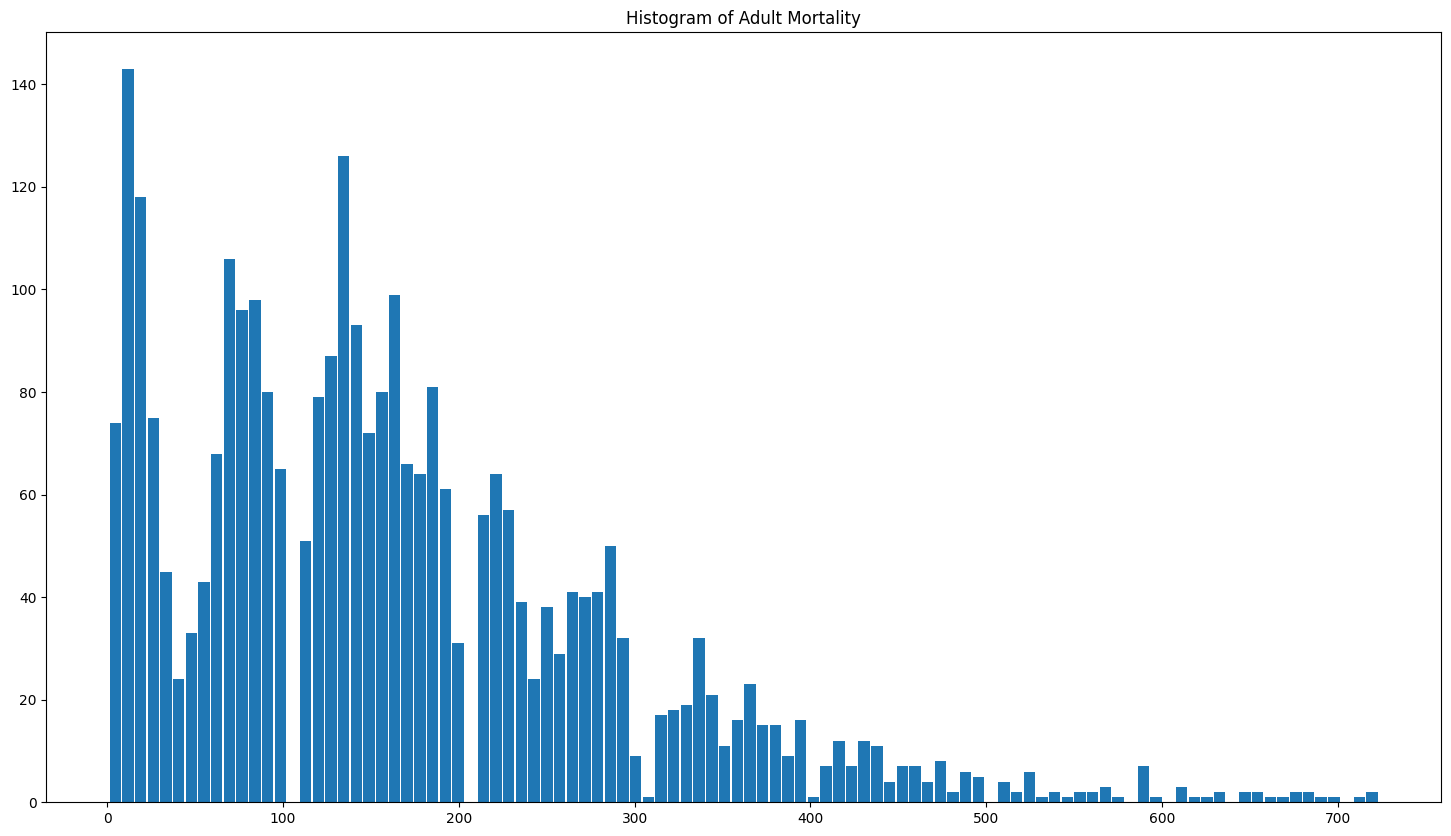

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(df['Adult Mortality'], bins=100, rwidth=0.9);
plt.title("Histogram of Adult Mortality")

### Data Transformation: Normalization and Log

In [ ]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [ ]:
df['GDP_Normalized'] = normalize(df['GDP'])
df['GDP_Log_Transformed'] = np.log(df['GDP'])

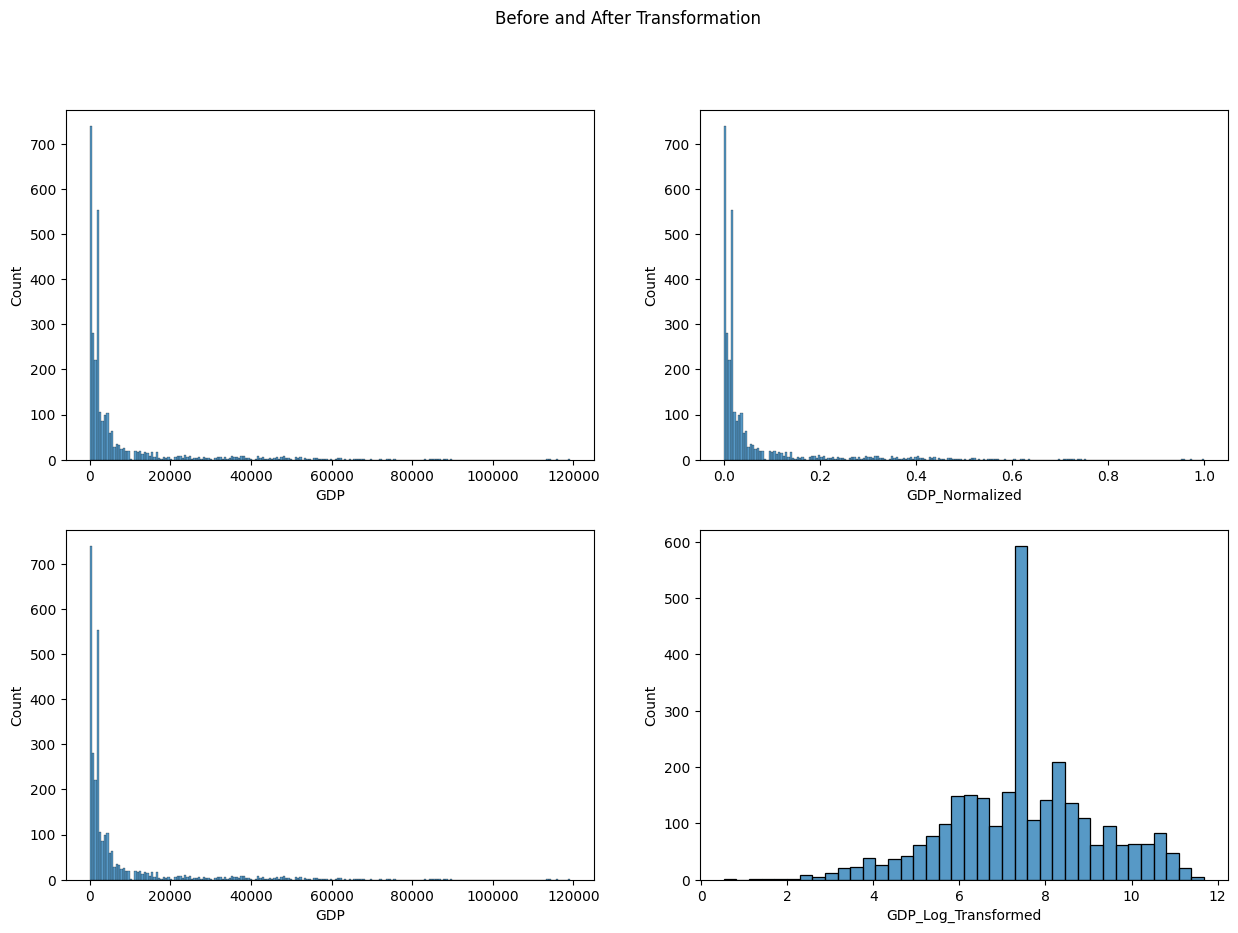

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Before and After Transformation")

#create boxplot in each subplot
sns.histplot(df, x="GDP", ax=axes[0, 0])
sns.histplot(df, x="GDP_Normalized", ax=axes[0,1])
sns.histplot(df, x="GDP", ax=axes[1,0])
sns.histplot(df, x="GDP_Log_Transformed", ax=axes[1,1]);

### Data Transformation: Binning for Boxplot

In [ ]:
print(df['Life expectancy'].min())
print(df['Life expectancy'].max())

36.3
89.0


In [ ]:
mybins = [30, 40, 50, 60, 70, 80, 90]
mylabels = ['30s', '40s', '50s', '60s', '70s', '80s']

df['Life expectancy Limits'] = pd.cut(df['Life expectancy'],
                                     bins = mybins,
                                     labels = mylabels,
                                     include_lowest = True,
                                     right = False)

In [ ]:
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life_expectancy_category,GDP_Normalized,GDP_Log_Transformed,Life expectancy Limits
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,Low,0.004889,6.370345,60s
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,612.696514,327582.0,17.5,17.5,0.476,10.0,Low,0.005127,6.417870,50s
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,Low,0.005287,6.448486,50s
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,Low,0.005608,6.507217,50s
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,Low,0.000519,4.151626,50s


### Boxplot

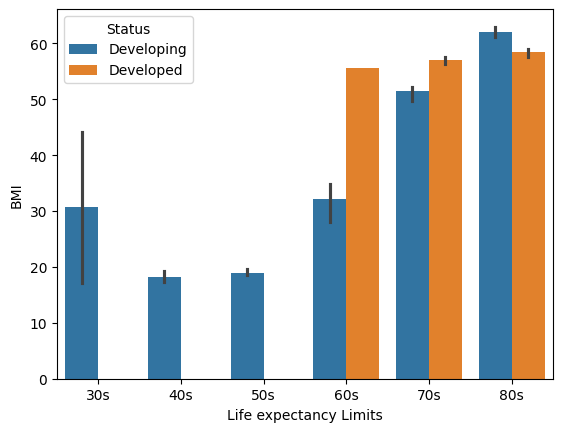

In [ ]:
sns.barplot(x='Life expectancy Limits', y='BMI', hue='Status',
           data=df, estimator=np.median);

Text(0.5, 1.0, 'GPD vs Life Expectancy')

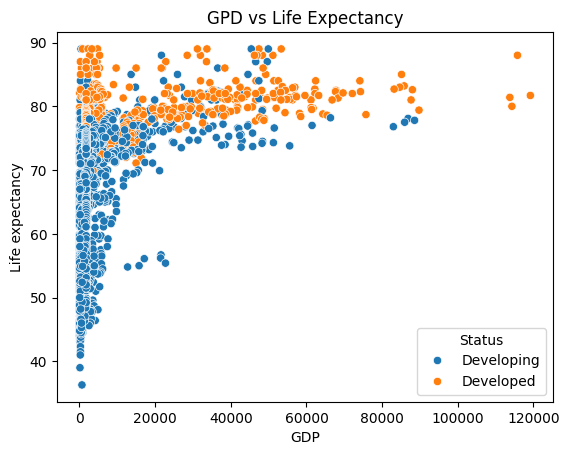

In [ ]:
plot = sns.scatterplot(data = df, x = 'GDP', y = 'Life expectancy', hue ='Status')
plot.set_ylabel("Life expectancy")
plot.set_xlabel("GDP")
plot.set_title("GPD vs Life Expectancy")

Text(0.5, 1.0, 'GPD vs Total Expenditure')

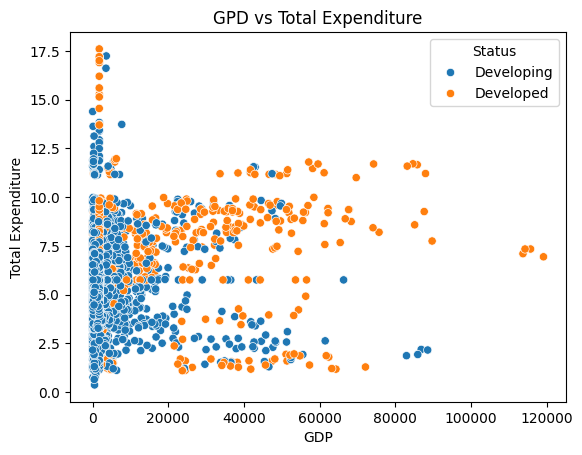

In [ ]:
plot = sns.scatterplot(data = df, x = 'GDP', y = 'Total expenditure', hue ='Status')
plot.set_ylabel("Total Expenditure")
plot.set_xlabel("GDP")
plot.set_title("GPD vs Total Expenditure")


## Model Development


In [ ]:
# Data Preprocessing
df = df.dropna()  # Dropping rows with missing values

# Define independent variables (X) and dependent variables (Y)
X = df.drop(['Life expectancy', 'Life_expectancy_category'], axis=1)  # Drop target columns
y_continuous = df['Life expectancy']  # For OLS
y_binary = df['Life_expectancy_category'].apply(lambda x: 1 if x == 'High' else 0)  # For Logit

# Add a constant to the independent variables (for intercept)
X = sm.add_constant(X)


In [ ]:
print("X shape:", X.shape)
print("y_continuous shape:", y_continuous.shape)
print("y_binary shape:", y_binary.shape)

X shape: (2938, 24)
y_continuous shape: (2938,)
y_binary shape: (2938,)


## OLS Regression

In [ ]:
# Define independent variables (X) and dependent variables (y_continuous)
X = df.drop(['Life expectancy', 'Life_expectancy_category'], axis=1)

# Ensure X contains only numerical columns
X = X.select_dtypes(include=[np.number])

# Add a constant to X for the intercept
X = sm.add_constant(X)

# Ensure y_continuous is numeric and drop any NaN values
y_continuous = pd.to_numeric(df['Life expectancy'], errors='coerce')

# Drop rows where y_continuous is NaN (if any)
valid_index = y_continuous.notnull()
X = X.loc[valid_index]
y_continuous = y_continuous.loc[valid_index]

# OLS Regression
ols_model = sm.OLS(y_continuous, X).fit()

# Print OLS summary
print("OLS Model Summary:")
print(ols_model.summary())

# Predict with OLS model
y_pred_ols = ols_model.predict(X)

# Calculate RMSE and R-squared
rmse_ols = np.sqrt(mean_squared_error(y_continuous, y_pred_ols))
r2_ols = r2_score(y_continuous, y_pred_ols)

# Step 5: Display Results
print(f"OLS RMSE: {rmse_ols:.2f}")
print(f"OLS R-squared: {r2_ols:.4f}")

OLS Model Summary:
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     663.9
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:04:01   Log-Likelihood:                -8267.3
No. Observations:                2938   AIC:                         1.658e+04
Df Residuals:                    2917   BIC:                         1.670e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

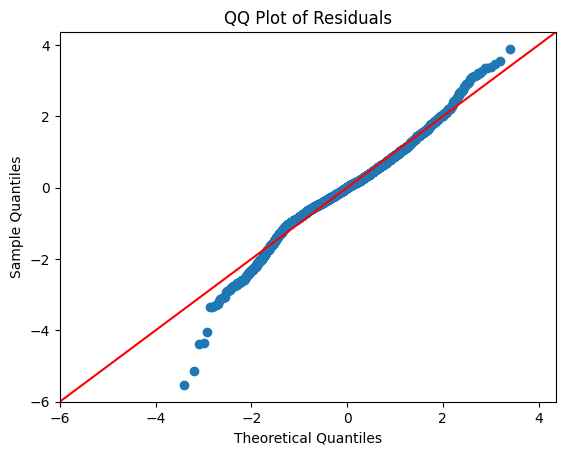

In [128]:
import scipy.stats as stats
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()


## Logit Regression

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

# Logit Regression
logit_model = sm.Logit(y_binary, X).fit()

# Print Logit summary
print("Logit Regression Summary:")
print(logit_model.summary())

# Predict probabilities and classes
y_pred_logit = logit_model.predict(X)
y_pred_logit_class = (y_pred_logit >= 0.5).astype(int)  # Convert probabilities to binary classification

# Evaluate Metrics
accuracy_logit = accuracy_score(y_binary, y_pred_logit_class)
precision_logit = precision_score(y_binary, y_pred_logit_class)
recall_logit = recall_score(y_binary, y_pred_logit_class)
conf_matrix = confusion_matrix(y_binary, y_pred_logit_class)

# Print Metrics
print(f"\nLogit Accuracy: {accuracy_logit:.2f}")
print(f"Logit Precision: {precision_logit:.2f}")
print(f"Logit Recall: {recall_logit:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Calculate ROC Curve and AUC (Numerical Analysis Only)
fpr, tpr, _ = roc_curve(y_binary, y_pred_logit)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.2f}")


Optimization terminated successfully.
         Current function value: 0.268673
         Iterations 11
Logit Regression Summary:
                              Logit Regression Results                              
Dep. Variable:     Life_expectancy_category   No. Observations:                 2938
Model:                                Logit   Df Residuals:                     2917
Method:                                 MLE   Df Model:                           20
Date:                      Tue, 17 Dec 2024   Pseudo R-squ.:                  0.6124
Time:                              19:18:48   Log-Likelihood:                -789.36
converged:                             True   LL-Null:                       -2036.5
Covariance Type:                  nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

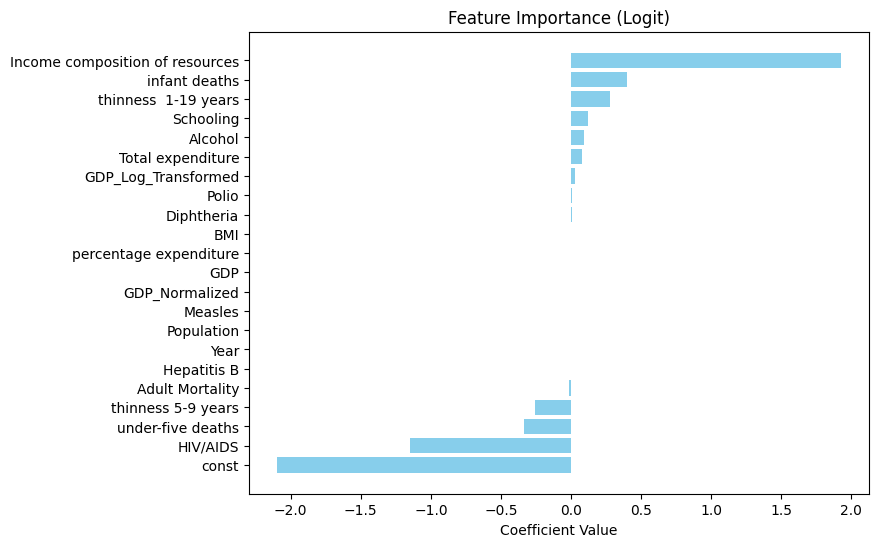

In [130]:
# Extract coefficients from statsmodels Logit model
coeffs = pd.DataFrame({'Feature': X.columns, 'Coefficient': logit_model.params})
coeffs = coeffs.sort_values(by='Coefficient', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 6))
plt.barh(coeffs['Feature'], coeffs['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logit)')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


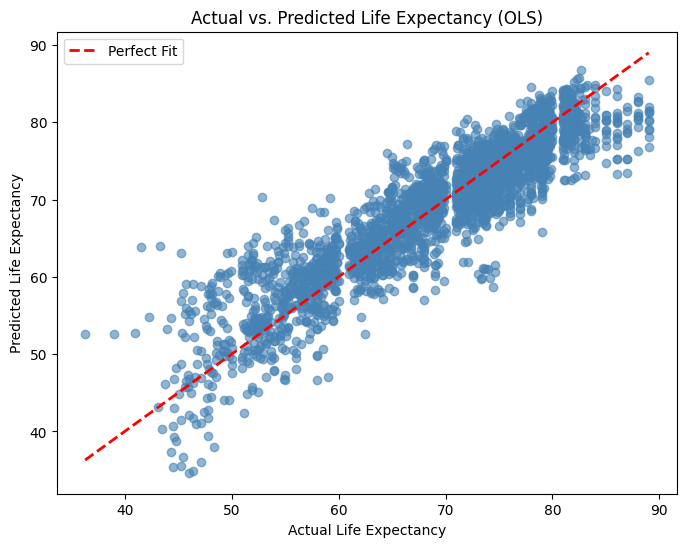

In [ ]:

# OLS Scatter Plot: Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_continuous, y_pred_ols, color='steelblue', alpha=0.6)
plt.plot([y_continuous.min(), y_continuous.max()], [y_continuous.min(), y_continuous.max()],
         color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs. Predicted Life Expectancy (OLS)')
plt.legend()
plt.show()


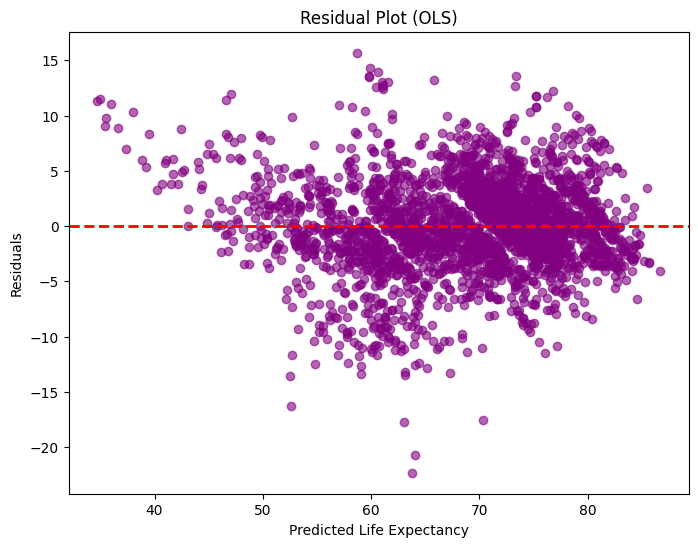

In [ ]:
# OLS Residual Plot
residuals = y_continuous - y_pred_ols

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ols, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.title('Residual Plot (OLS)')
plt.show()


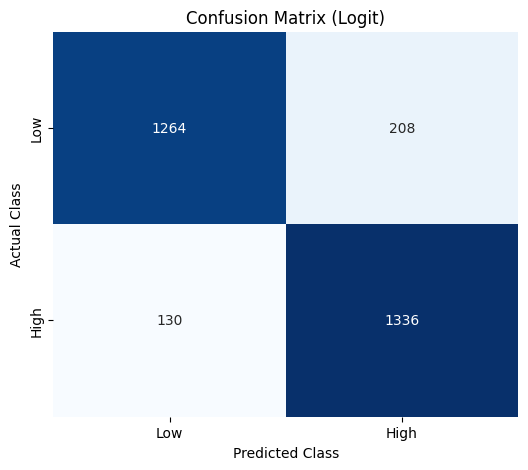

In [ ]:


# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_binary, y_pred_logit_class)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix (Logit)')
plt.show()


## ROC Curve for Logit Regression

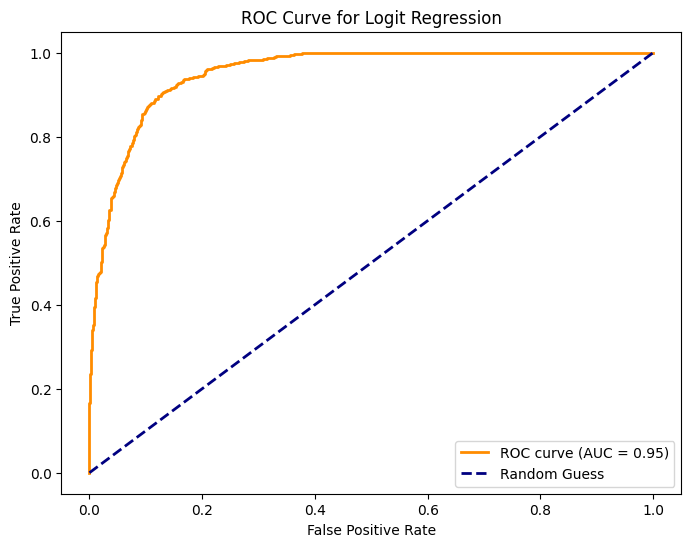

In [ ]:
# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_binary, y_pred_logit)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logit Regression')
plt.legend(loc="lower right")
plt.show()


In [131]:
from nbconvert import HTMLExporter
import nbformat

# Load the notebook
notebook_path = ("/content/drive/MyDrive/Colab Notebooks/life_expectancy_assignment.ipynb")
output_html_path = ("/content/drive/MyDrive/foundation_of_analytics/Exam/Final/Life_Expectancy_Prediction_Assignment.html")

with open(notebook_path) as f:
  notebook_content = nbformat.read(f, as_version=4)

#Convert to HTML
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(notebook_content)

# save to HTML File
with open(output_html_path, 'w') as f:
  f.write(body)